In [2]:
import sklearn
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()

In [3]:
print(boston.keys())
print(boston.data.shape)
X, y = boston.data, boston.target

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


#### Zadanie 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


#### Zadanie 2)

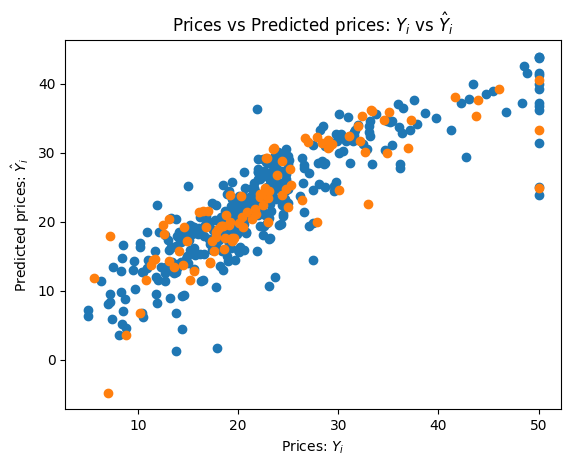

In [30]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

regr = LinearRegression()
regr.fit(X_train, y_train)
Y_pred = regr.predict(X_test)
Y_train_pred = regr.predict(X_train)

plt.scatter(y_train, Y_train_pred)
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

#### Zadanie 3)

In [31]:
from sklearn.metrics import mean_squared_error

print(f"Mean squared error: {mean_squared_error(y_test, Y_pred):.3f}")

Mean squared error: 24.946


#### Zadanie 4)

In [32]:
regr.score(X_test, y_test)

0.7197514053207484

In [33]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

Y = pd.DataFrame(boston.target)
scaler = StandardScaler()
scaler.fit(Y)
Y_norm = scaler.transform(Y)

In [34]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_norm)
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y_norm, test_size=0.2)

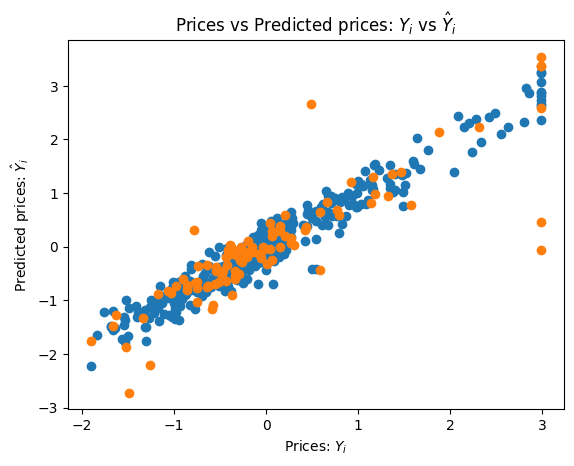

In [36]:
regr = LinearRegression()
regr.fit(X_train, y_train)
Y_pred = regr.predict(X_test)
Y_train_pred = regr.predict(X_train)

plt.scatter(y_train, Y_train_pred)
plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()
# Możemy zauważyć, iż zachowanie punktów jest dużo lepsze tym razem

In [39]:
print(f"Mean squared error: {mean_squared_error(y_test, Y_pred):.3f}")
print(f"Model score: {regr.score(X_test, y_test):.3f}")

Mean squared error: 0.305
Model score: 0.725


#### Zadanie 5)

C:\Users\kocha\AppData\Local\Temp\ipykernel_10852\469675939.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  clf.fit(X_train, y_train)
C:\Users\kocha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\kocha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+01, tolerance: 3.927e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd

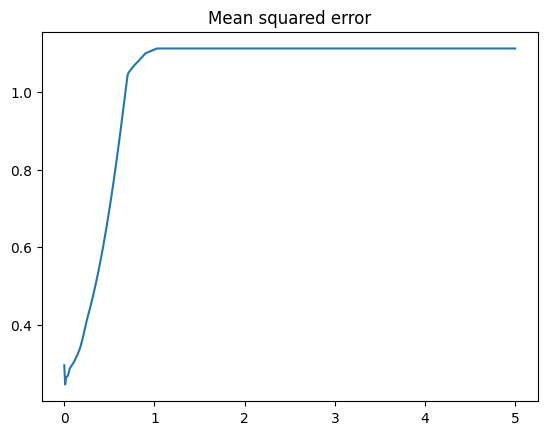

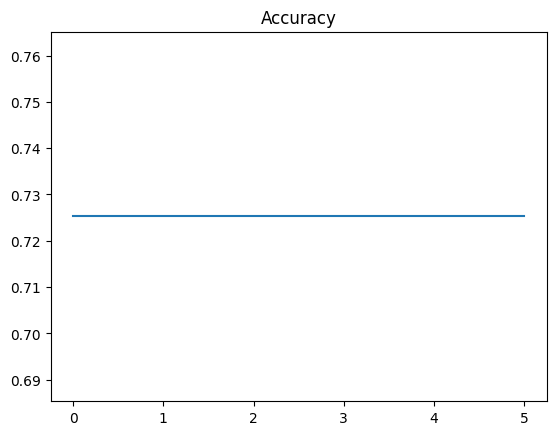

In [47]:
from sklearn.linear_model import Ridge, Lasso
from copy import deepcopy
import numpy as np

mse_result, accuracy_result = [], []
alpha = np.linspace(0, 5, 500)

for number in alpha:
    clf = Lasso(alpha=number)
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)

    mse_result.append(mean_squared_error(Y_pred, y_test))
    accuracy_result.append(deepcopy(regr.score(X_test, y_test)))

plt.plot(alpha, mse_result)
plt.title("Mean squared error")
plt.show()

plt.title("Accuracy")
plt.plot(alpha, accuracy_result)
plt.show()

### Zadanie 6)

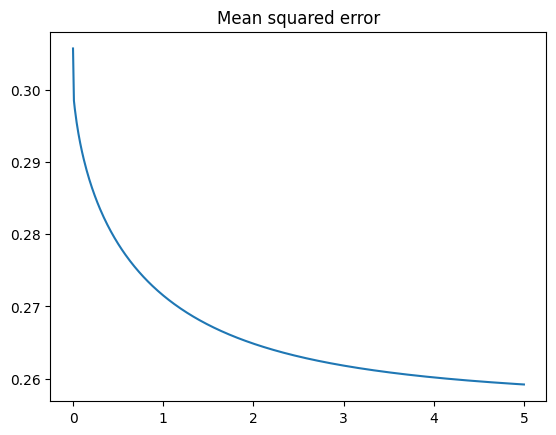

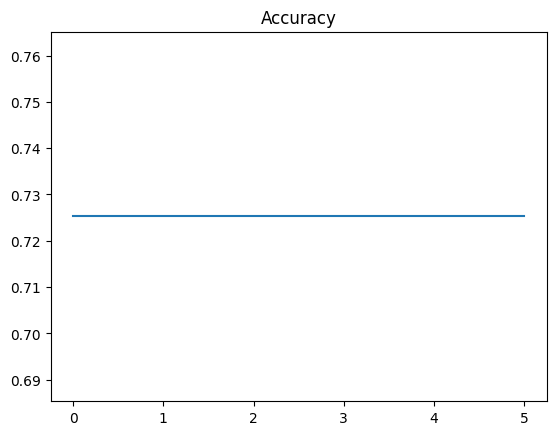

In [50]:
mse_result, accuracy_result = [], []
alpha = np.linspace(0, 5, 500)

for number in alpha:
    clf = Ridge(alpha=number)
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_test)

    mse_result.append(mean_squared_error(Y_pred, y_test))
    accuracy_result.append(deepcopy(regr.score(X_test, y_test)))

plt.plot(alpha, mse_result)
plt.title("Mean squared error")
plt.show()

plt.title("Accuracy")
plt.plot(alpha, accuracy_result)
plt.show()

### Regularisation for Logistic Regression

[Dataset A]

In [58]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
df = pd.DataFrame(data.data)
df.columns = data.feature_names
X, y = data.data, data.target

#### Zadanie 1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Zadanie 2)

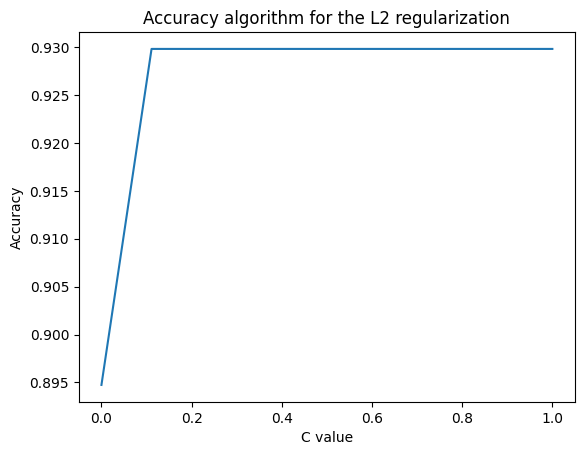

In [61]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

C = np.linspace(0.0001, 1, 10)
accuracy_result = []

for number in C:
    log_reg = LogisticRegression(penalty='l2', C=number, solver='newton-cg')
    log_reg.fit(X_train, y_train)
    Y_pred = log_reg.predict(X_test)
    accuracy_result.append((metrics.accuracy_score(y_test, Y_pred)))

plt.plot(C, accuracy_result)
plt.title("Accuracy algorithm for the L2 regularization")
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.show()